In [225]:
import pandas as pd

In [227]:
df = pd.read_csv('income.csv')

In [229]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [231]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [233]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [235]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [237]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [239]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [241]:
df['gender']=df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income']=df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [243]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [245]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'workclass_Divorced', 'workclass_Married-AF-spouse',
       'workclass_Married-civ-spouse', 'workclass_Married-spouse-absent',
       'workclass_Never-married', 'work

<Axes: >

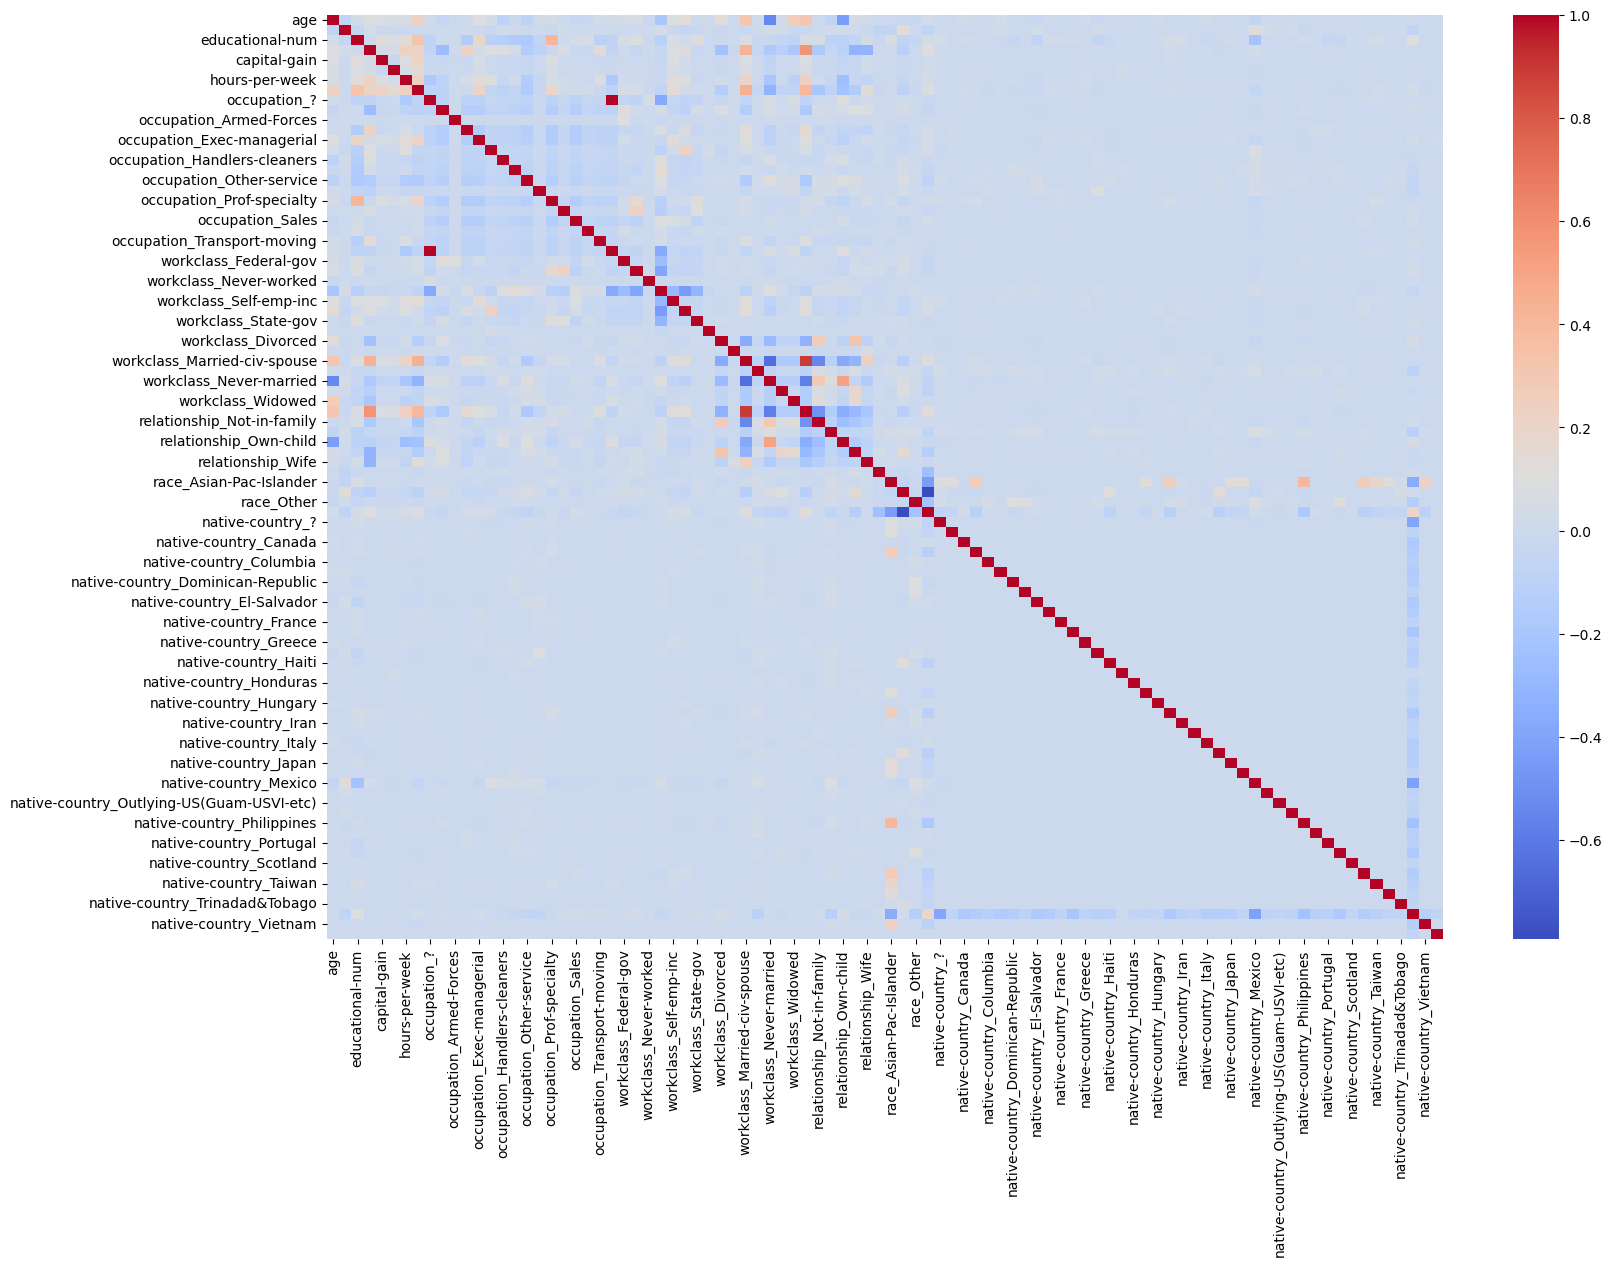

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot= False, cmap='coolwarm')

In [249]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [251]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

<Axes: >

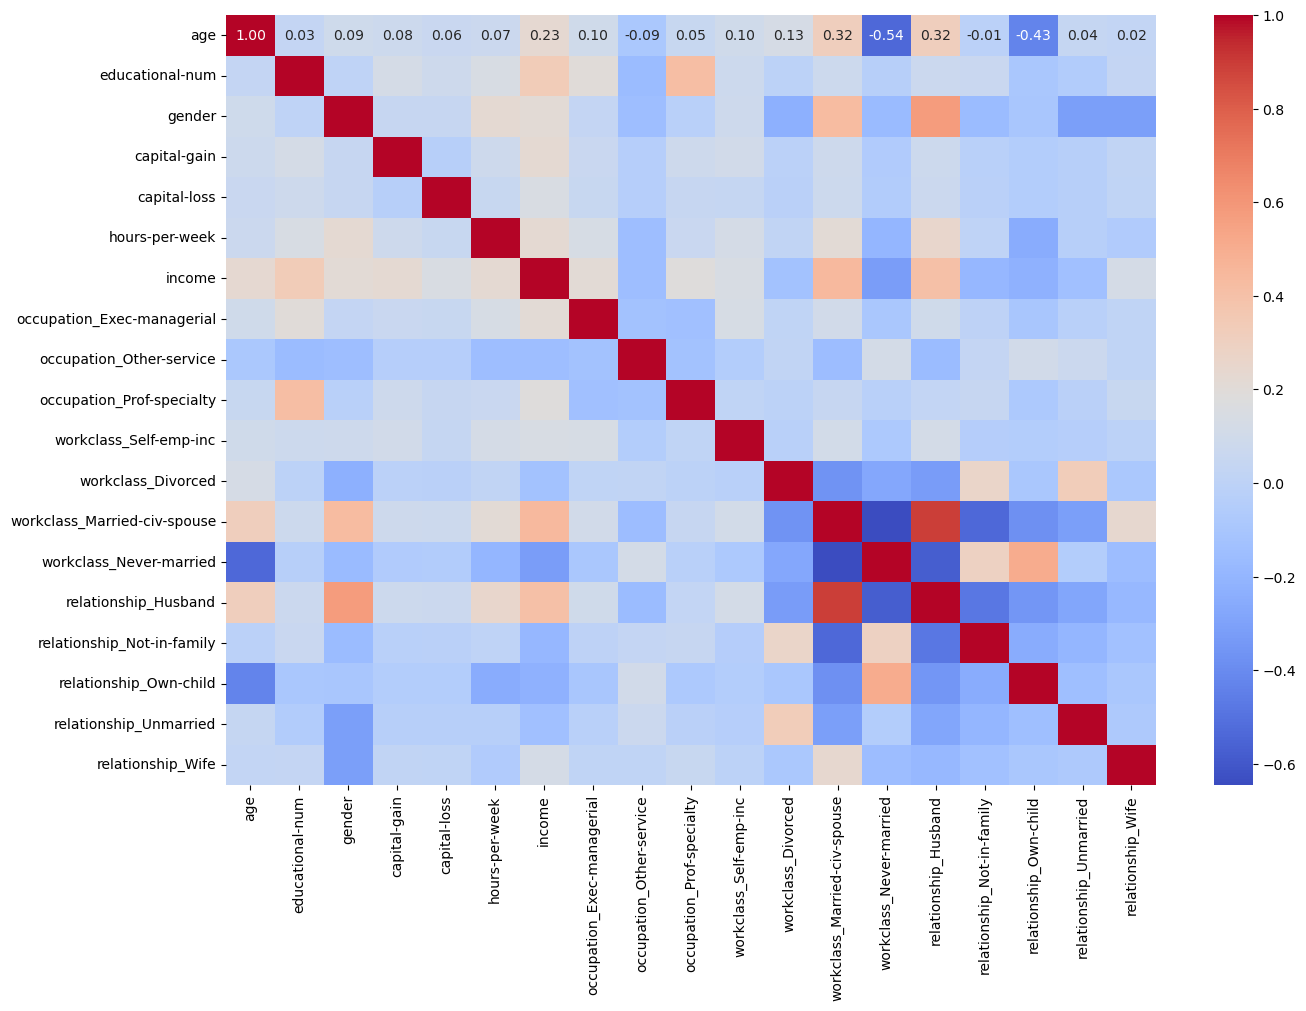

In [253]:

plt.figure(figsize=(15, 10))
sns.heatmap(df_dropped.corr(), annot=True, fmt=".2f", cmap='coolwarm')


In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df=df.drop('fnlwgt', axis=1)
train_df, test_df = train_test_split(df, test_size=0.2)

In [277]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15820,21,10,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
29347,47,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48546,37,13,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
46239,53,13,1,0,0,60,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
23595,21,9,1,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35633,23,12,0,0,0,40,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
17322,23,10,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42947,19,10,0,0,0,15,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29310,30,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [281]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
43921,38,14,1,99999,0,65,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
46154,43,15,1,0,0,35,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1786,47,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
46802,27,10,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15133,37,9,1,0,0,75,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48065,31,13,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28616,63,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40378,19,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
24314,29,10,0,0,0,24,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [283]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

In [285]:
test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [287]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [289]:
forest.score(test_X, test_y)

0.8487050875217524

In [291]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k:v for k,v in sorted(importances.items(), key=lambda x:x[1], reverse = True)}

In [293]:
importances

{'age': 0.2298377769923705,
 'educational-num': 0.126812034027592,
 'hours-per-week': 0.11460247054522961,
 'capital-gain': 0.1140128456382511,
 'workclass_Married-civ-spouse': 0.0721858964955062,
 'capital-loss': 0.04026539739849275,
 'relationship_Husband': 0.03865141791039874,
 'workclass_Never-married': 0.025256121596308242,
 'occupation_Exec-managerial': 0.01999821702389067,
 'occupation_Prof-specialty': 0.017087532071730076,
 'gender': 0.013682467498815671,
 'relationship_Not-in-family': 0.013537898443388065,
 'relationship_Own-child': 0.010126513022942733,
 'workclass_Private': 0.009237243045698942,
 'relationship_Wife': 0.009090914481135767,
 'workclass_Divorced': 0.00855100183070107,
 'workclass_Self-emp-not-inc': 0.00787526985704926,
 'occupation_Other-service': 0.007411915278587756,
 'workclass_Self-emp-inc': 0.0064112465121818245,
 'occupation_Craft-repair': 0.006203631958602603,
 'race_White': 0.006135238373320471,
 'native-country_United-States': 0.006121914847207431,
 'o

In [297]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[50, 100, 250],
    'max_depth':[5, 10, 30, None],
    'min_samples_split':[2, 4],
    'max_features':['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [299]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.8s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.6s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.6s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.6s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [301]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [303]:
forest = grid_search.best_estimator_
forest.score(test_X,test_y)

0.8618077592384072

In [305]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k:v for k,v in sorted(importances.items(), key=lambda x:x[1], reverse = True)}

In [307]:
importances

{'age': 0.14513758036210736,
 'capital-gain': 0.138885378663996,
 'educational-num': 0.1355485485740995,
 'workclass_Married-civ-spouse': 0.09231699934345164,
 'hours-per-week': 0.08792740231609185,
 'relationship_Husband': 0.05536567935910039,
 'capital-loss': 0.04527094969508474,
 'workclass_Never-married': 0.03804712903803582,
 'occupation_Exec-managerial': 0.023585600433966097,
 'occupation_Prof-specialty': 0.022692191203263667,
 'relationship_Not-in-family': 0.016029839192168084,
 'gender': 0.01592289360112134,
 'relationship_Own-child': 0.012604392035692498,
 'relationship_Wife': 0.01092614283817086,
 'occupation_Other-service': 0.009417677054625689,
 'workclass_Private': 0.008630213435274174,
 'workclass_Self-emp-not-inc': 0.008196377261474761,
 'workclass_Divorced': 0.00803043926414852,
 'relationship_Unmarried': 0.0077900240298543165,
 'workclass_Self-emp-inc': 0.006471120045349954,
 'native-country_United-States': 0.006009210371219209,
 'race_White': 0.006000174569138492,
 'w